In [53]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
# load dataset

data = pd.read_csv(r'/Users/jasna/Downloads/netflix1.csv')

In [3]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
# checking for missing values

data.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [5]:
# dropping duplicates if any

data.drop_duplicates(inplace = True)

In [6]:
# dropping rows with missing critical information

data.dropna(subset=['director',       'title',      'country'], inplace=True)

In [7]:
# converting date_added to datetime

data['date_added'] = pd.to_datetime(data['date_added'])

In [8]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [9]:
data.shape

(8790, 10)

In [10]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [12]:
data.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [13]:
# Content Type Distribution (Movies vs. TV Shows)
type_count = data['type'].value_counts()
type_count

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

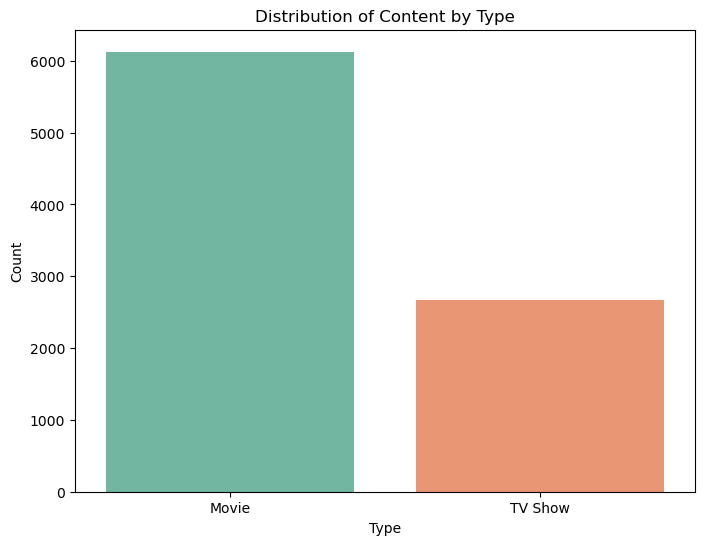

In [14]:
# plotting the distribution

plt.figure(figsize = (8,6))
sns.barplot(x = type_count.index, y = type_count.values, palette = 'Set2')
plt.title("Distribution of Content by Type")
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

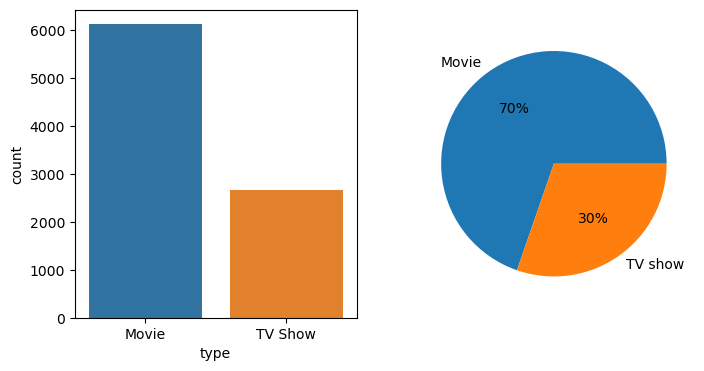

In [15]:
freq = data['type'].value_counts()
fig,axes = plt.subplots(1,2, figsize = (8,4))
sns.countplot(data, x = data['type'],ax = axes[0])
plt.pie(freq, labels = ('Movie','TV show'), autopct = '%.0f%%')
plt.title = 'Total content on Netflix'
plt.show()

In [16]:
data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [17]:
ratings = data['rating'].value_counts().reset_index().sort_values(by = 'count', ascending = False)
ratings

,rating,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


Text(0.5, 0.98, 'Rating on Netflix')

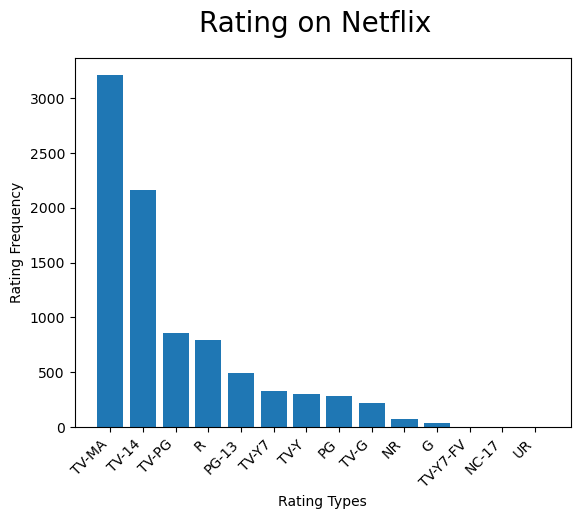

In [18]:
plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', fontsize=20)

Text(0.5, 0.98, 'Rating on Netflix')

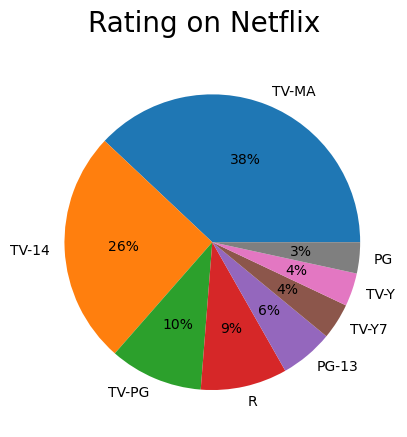

In [19]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20)

In [20]:
data['release_year'].unique()

array([2020, 2021, 1993, 2019, 2013, 2014, 2018, 1998, 2010, 2017, 1997,
       1996, 1975, 1978, 1983, 1987, 2012, 2001, 2002, 2003, 2004, 2011,
       2008, 2009, 2007, 2005, 2006, 2016, 1994, 2015, 1982, 1989, 1990,
       1991, 1999, 1986, 1984, 1980, 1961, 2000, 1995, 1985, 1925, 1992,
       1976, 1959, 1988, 1981, 1972, 1964, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1960, 1974, 1966, 1971, 1962, 1969, 1977, 1967, 1968,
       1965, 1945, 1946, 1942, 1955, 1944, 1947, 1943])

In [21]:
data['country'].unique()

array(['United States', 'France', 'Brazil', 'United Kingdom', 'India',
       'Germany', 'Pakistan', 'Not Given', 'China', 'South Africa',
       'Japan', 'Nigeria', 'Spain', 'Philippines', 'Australia',
       'Argentina', 'Canada', 'Hong Kong', 'Italy', 'New Zealand',
       'Egypt', 'Colombia', 'Mexico', 'Belgium', 'Switzerland', 'Taiwan',
       'Bulgaria', 'Poland', 'South Korea', 'Saudi Arabia', 'Thailand',
       'Indonesia', 'Kuwait', 'Malaysia', 'Vietnam', 'Lebanon', 'Romania',
       'Syria', 'United Arab Emirates', 'Sweden', 'Mauritius', 'Austria',
       'Turkey', 'Czech Republic', 'Cameroon', 'Netherlands', 'Ireland',
       'Russia', 'Kenya', 'Chile', 'Uruguay', 'Bangladesh', 'Portugal',
       'Hungary', 'Norway', 'Singapore', 'Iceland', 'Serbia', 'Namibia',
       'Peru', 'Mozambique', 'Ghana', 'Zimbabwe', 'Israel', 'Finland',
       'Denmark', 'Paraguay', 'Cambodia', 'Georgia', 'Soviet Union',
       'Greece', 'West Germany', 'Iran', 'Venezuela', 'Slovenia',
       'Gua

In [22]:
# most common genres
# Split the 'listed_in' column and count genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)
genre_counts

International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

In [23]:
data.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries]
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV Ac..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International Mov..."
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV","[British TV Shows, Reality TV]"
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas","[Comedies, Dramas]"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...","[Children & Family Movies, Comedies, Music & M..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies","[Dramas, International Movies]"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,2021-05-01,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals","[Children & Family Movies, Music & Musicals]"


Text(0.5, 0.98, 'Most common genres on Netflix')

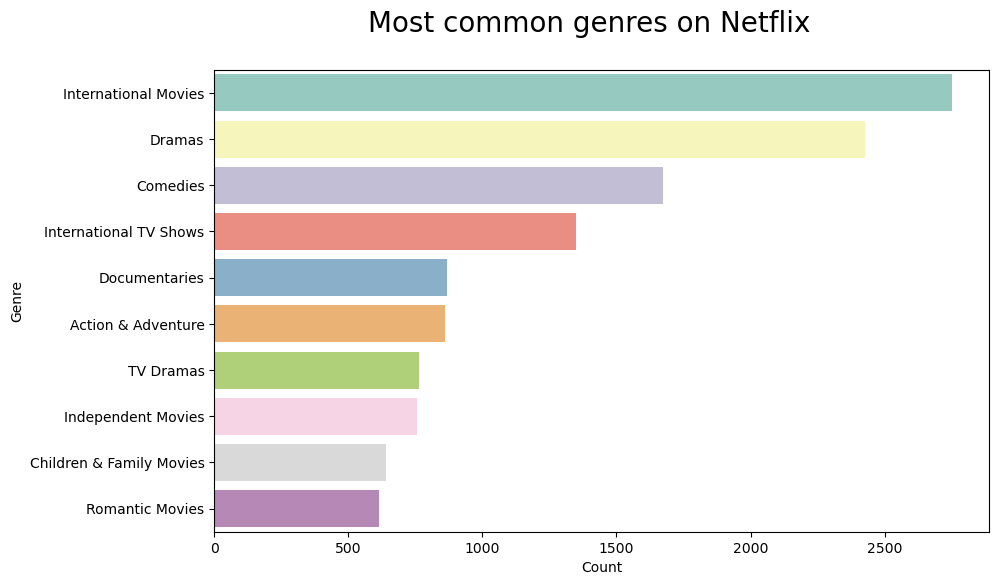

In [24]:
# plotting the most common genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values,        y=genre_counts.index, palette='Set3')
plt.xlabel("Count")
plt.ylabel("Genre")
plt.suptitle('Most common genres on Netflix', fontsize = 20)

In [25]:
# content added over time
# extract year and month from date_added

data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

Text(0.5, 0.98, 'Content added over time')

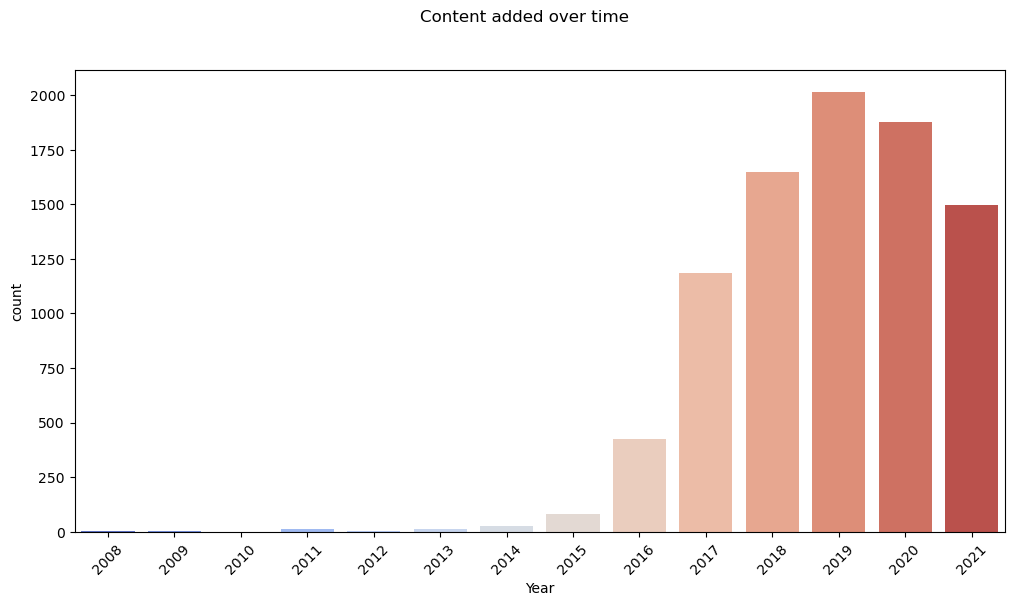

In [26]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'year_added', data = data, palette = 'coolwarm')
plt.xlabel('Year')
plt.ylabel("count")
plt.xticks(rotation = 45)

plt.suptitle('Content added over time')

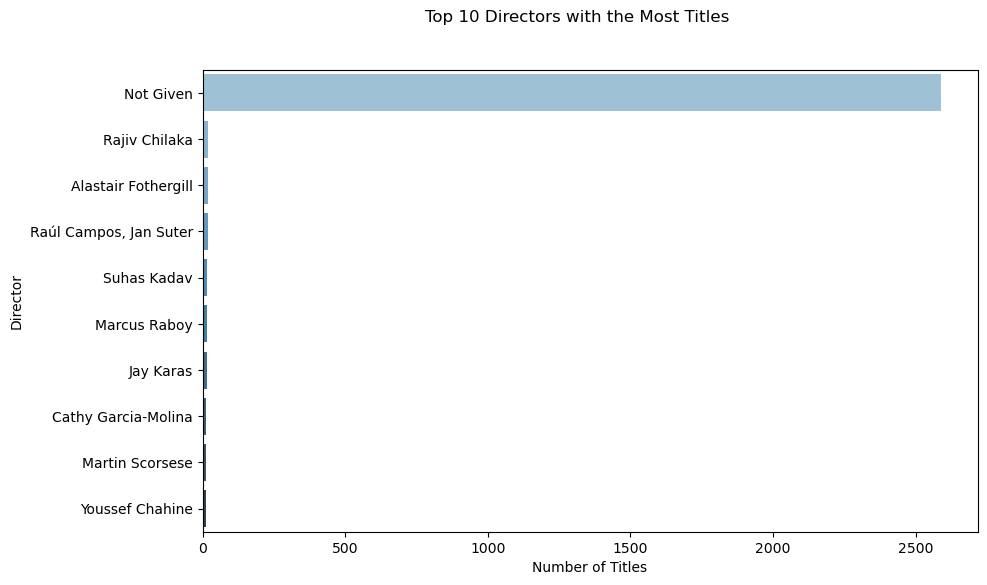

In [27]:
# Top 10 directors with the most titles
# count titles by director

top_directors = data['director'].value_counts().head(10)
top_directors

plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values,     y=top_directors.index, palette='Blues_d')
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.suptitle("Top 10 Directors with the Most Titles")
plt.show()

### Word cloud of movie titles

In [28]:
# Generate word cloud
movie_titles = data[data['type'] == 'Movie']['title'] 
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

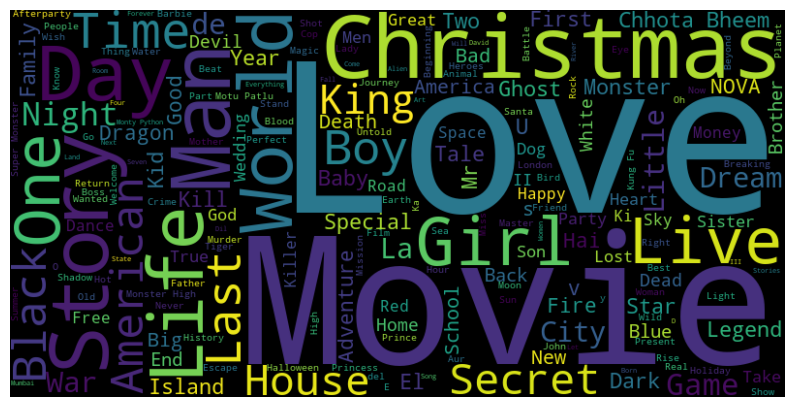

In [29]:
# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.show()

### Top 10 countries with most content on Netflix

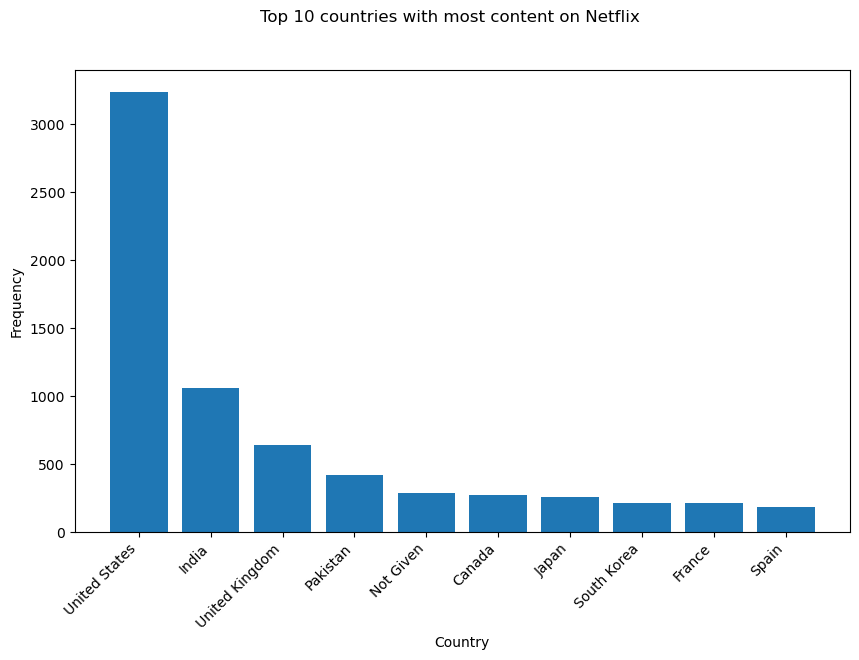

In [30]:
top_ten_countries=data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['country'], top_ten_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()

In [31]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],2021,9
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV Ac...",2021,9
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",2021,9
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",2021,9
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International Mov...",2021,9


In [32]:
int_col = data.select_dtypes(include=('int')).columns
str_col = data.select_dtypes(include=('object')).columns
flt_col = data.select_dtypes(include=('float')).columns

In [33]:
# Label encoding the categorical columns

le = LabelEncoder()
for col in str_col:
   data[col] = le.fit_transform(data[col].astype('str'))

In [34]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year_added,month_added
0,0,0,1972,2294,80,2021-09-25,2020,4,210,273,308,2021,9
1,2222,1,2644,2104,20,2021-09-24,2021,8,0,241,262,2021,9
2,5551,1,4558,2865,80,2021-09-24,2021,8,0,498,497,2021,9
3,445,0,1657,627,6,2021-09-22,2021,9,211,124,151,2021,9
4,7761,0,6043,1503,80,2021-09-24,1993,8,32,318,335,2021,9


In [41]:
data.dtypes

show_id                  int64
type                     int64
title                    int64
director                 int64
country                  int64
date_added      datetime64[ns]
release_year             int64
rating                   int64
duration                 int64
listed_in                int64
genres                   int64
year_added               int32
month_added              int32
dtype: object

In [46]:
data.drop(['date_added'], axis = 'columns',inplace = True)

In [47]:
data.shape

(8790, 12)

In [48]:
X = data.drop(['type'], axis = 'columns')
y = data['type']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


### Random Forest Classifier for Predictive Modeling

In [50]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy of the RandomForestClassifier on the test set: {accuracy}")

Accuracy of the RandomForestClassifier on the test set: 0.9960182025028441


In [54]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
print("Training score of LogisticRegression is: {}".format(log.score(X_train,y_train) * 100))
y_predlog=log.predict(X_test)
print(y_predlog)
am_log=accuracy_score(y_test,y_predlog) * 100
print("Accuracy of LogisticRegression Classifier is: {}%".format(am_log))
print("{}".format(classification_report(y_test,y_predlog)))

Training score of LogisticRegression is: 80.40386803185437
[1 1 1 ... 0 0 1]
Accuracy of LogisticRegression Classifier is: 81.11490329920365%
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1241
           1       0.70      0.62      0.66       517

    accuracy                           0.81      1758
   macro avg       0.78      0.75      0.76      1758
weighted avg       0.81      0.81      0.81      1758



/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
